<a href="https://colab.research.google.com/github/PrakashRanjanShrivastava/TIME-_Series-Analysis/blob/main/Apple_time_series__forecast_not__ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
import io
import math
import datetime
%matplotlib inline

In [ ]:
from google.colab import files

Loading the Data

In [ ]:
data_to_load = files.upload()

Saving AAPL_new.csv to AAPL_new.csv


In [ ]:
appl_df = pd.read_csv(io.BytesIO(data_to_load['AAPL_new.csv']))

In [ ]:
appl_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111500,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507280,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047251,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074554,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191277,283192000
...,...,...,...,...,...,...,...
1742,2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400
1743,2022-12-05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
1744,2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
1745,2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100


In [ ]:
appl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1747 non-null   object 
 1   Open       1747 non-null   float64
 2   High       1747 non-null   float64
 3   Low        1747 non-null   float64
 4   Close      1747 non-null   float64
 5   Adj Close  1747 non-null   float64
 6   Volume     1747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 95.7+ KB


In [ ]:
appl_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1.747000e+03
mean,78.650488,79.563021,77.782411,78.712038,77.214543,1.212661e+08
std,49.291109,49.951012,48.636483,49.316967,49.746965,5.762406e+07
min,22.500000,22.917500,22.367500,22.584999,20.914919,3.519590e+07
25%,39.095001,39.418751,38.755001,39.049999,37.125481,8.365780e+07
50%,53.512501,54.195000,52.900002,53.330002,51.808430,1.057152e+08
75%,128.728745,130.194999,126.970001,128.750000,127.222779,1.408545e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,5.334788e+08


Changing the  datatype  of Date as datetime object

In [ ]:
 appl_df['Date'] = pd.to_datetime(appl_df['Date'])
 appl_df.set_index('Date',inplace= True)
 appl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111500,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507280,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047251,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074554,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191277,283192000


lets visualise adj close

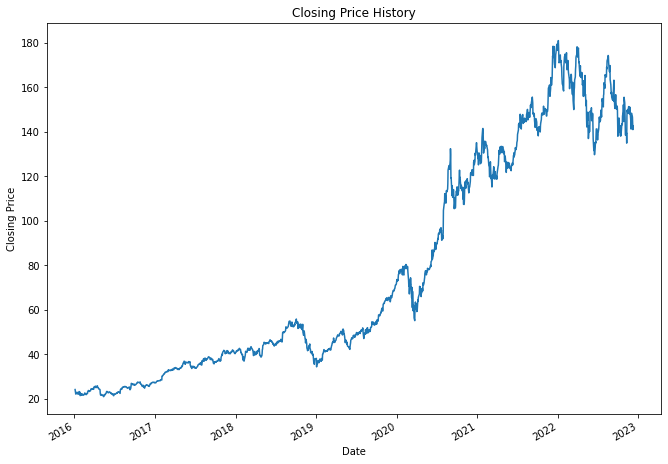

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
appl_df['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

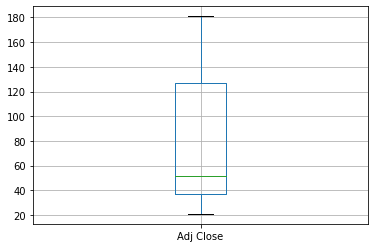

In [ ]:
appl_df.boxplot(column= ['Adj Close'])

Visualising the other columns in the Data 

<Figure size 1152x720 with 0 Axes>

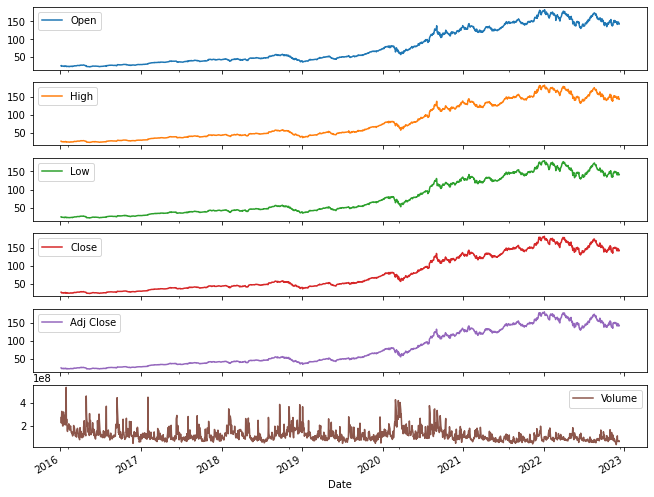

In [ ]:
plt.figure(figsize=(16,10))
cols =['Open',	'High','Low',	'Close',	'Adj Close',	'Volume']
axes= appl_df[cols].plot(figsize=(11,9), subplots = True)
plt.show()

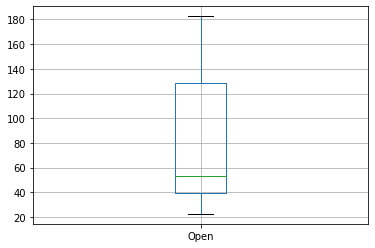

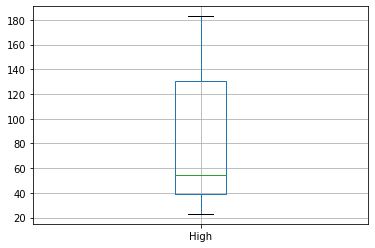

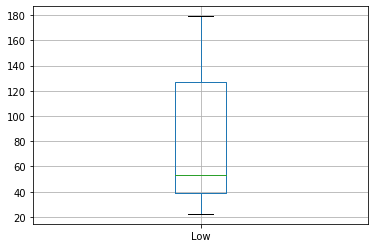

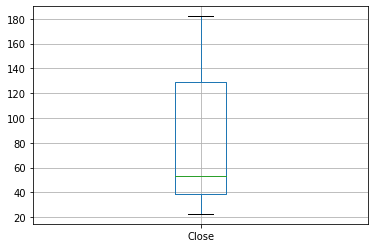

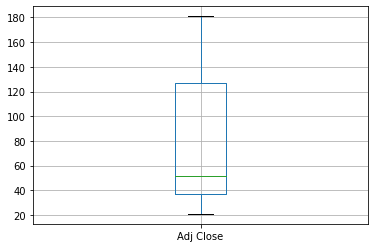

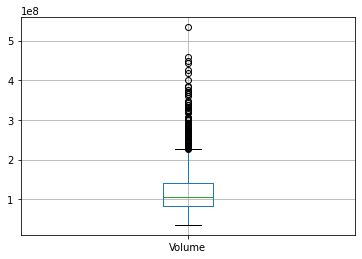

In [ ]:
cols =['Open',	'High','Low',	'Close',	'Adj Close',	'Volume']
for i in cols:
  plt.subplots()
  axes = appl_df.boxplot(column=[i])
plt.show()


Plotting the correlation graph between the variables 

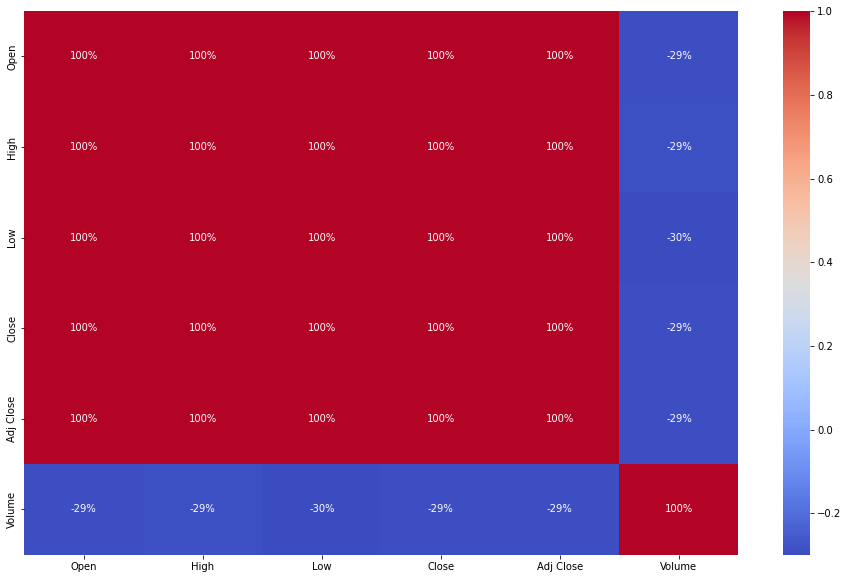

In [ ]:
plt.figure(figsize = (16,10))
cor = appl_df.corr()
sns.heatmap(cor, annot = True, cmap = 'coolwarm',fmt = '.0%')
plt.show()

From above graph we can see that the variables are highly correlated . So, we have to drop the above variables and add new features to the data .

Adding new features 

HL_PCT calculates for the high-low percentage for each day and the PCT_change calculatesfor the open-close percentage for each day.

In [ ]:
appl_df['Hl_pct'] = (appl_df['High'])-(appl_df['Low'])/(appl_df['Low'])*100
appl_df['Pct_change']= (appl_df['Close'])-(appl_df['Open'])/(appl_df['Open'])*100

In [ ]:
 appl_df.head()

,Open,High,Low,Close,Adj Close,Volume,Hl_pct,Pct_change
Date,,,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111500,270597600,-73.657499,-73.662500
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507280,223164000,-73.537500,-74.322500
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047251,273829600,-74.407499,-74.825001
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074554,324377600,-74.967501,-75.887501
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191277,283192000,-75.222500,-75.760000


Checking for null vaues 

In [ ]:
appl_df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Hl_pct        0
Pct_change    0
dtype: int64

Picking the features 

In [ ]:
appl_df1 = appl_df[['Adj Close','Hl_pct','Pct_change','Volume']]

Picking the Forecast data

In [ ]:
forecast_out = int(math.ceil(0.10*len(appl_df1)))
print(forecast_out)
appl_df1['label'] =appl_df['Adj Close'].shift(-forecast_out)

175


<ipython-input-18-f65c01f3ebe9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl_df1['label'] =appl_df['Adj Close'].shift(-forecast_out)


In [ ]:
appl_df1

,Adj Close,Hl_pct,Pct_change,Volume,label
Date,,,,,
2016-01-04,24.111500,-73.657499,-73.662500,270597600,25.127247
2016-01-05,23.507280,-73.537500,-74.322500,223164000,26.016424
2016-01-06,23.047251,-74.407499,-74.825001,273829600,26.900934
2016-01-07,22.074554,-74.967501,-75.887501,324377600,26.749640
2016-01-08,22.191277,-75.222500,-75.760000,283192000,26.437738
...,...,...,...,...,...
2022-12-02,147.809998,48.000000,47.809998,65421400,NaN
2022-12-05,146.630005,50.919998,46.630005,68826400,NaN
2022-12-06,142.910004,47.300003,42.910004,64727200,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Scaling the data

Now we scale the data between -1 and 1 in order to put all columns in the dataset in the same range. We will be using StandardScaler function from the preprocessing module of the sklearn library

In [ ]:
scaler = StandardScaler()
X = np.array(appl_df1.drop(['label'],1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-21-370c27f0e370>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(appl_df1.drop(['label'],1))


In [ ]:
X

array([[-1.06776862, -1.06575935, -1.06230244,  2.59222124],
       [-1.07991796, -1.06335633, -1.07568909,  1.76882932],
       [-1.08916799, -1.08077836, -1.08588122,  2.64832499],
       ...,
       [ 1.32097045,  1.35645653,  1.30211471, -0.98144856],
       [ 1.28135866,  1.27775676,  1.26215755, -0.89476029],
       [ 1.3157423 ,  1.28076075,  1.29684098, -1.02752932]])

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

Getting the target values


In [ ]:
appl_df1.dropna(inplace = True)
y = np.array(appl_df1['label'])

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


We are going to train the model with 80% of X

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2,random_state=45)

Linear regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_confidence = lr.score(x_test, y_test)
lr_confidence

dtype('float64')

Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_confidence = rf.score(x_test, y_test)

In [ ]:
print(rf_confidence)

0.973032415323708


Ridge


In [ ]:
rg = Ridge()
rg.fit(x_train, y_train)
rg_confidence = rg.score(x_test, y_test)
rg_confidence

0.8584631136526679

In [ ]:
print(rg_confidence)

0.8584631136526679


SVR

In [ ]:
svr = SVR()
svr.fit(x_train, y_train)
svr_confidence = svr.score(x_test, y_test)

In [ ]:
print(svr_confidence)

0.9215125627566372


Now that we have calculated the accuracy for 4 different models, let’s visualise which models have the best accuracy.

In [ ]:
names = ['Linear Regression','Random Forest','Ridge','SVR']
columns = ['model','accuracy']
scores = [lr_confidence,rf_confidence,rg_confidence,svr_confidence]
alg_vs_score  = pd.DataFrame([[x,y] for x,y in zip(names,scores)], columns =columns)
print(alg_vs_score)

               model  accuracy
0  Linear Regression  0.885251
1      Random Forest  0.973032
2              Ridge  0.858463
3                SVR  0.921513


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

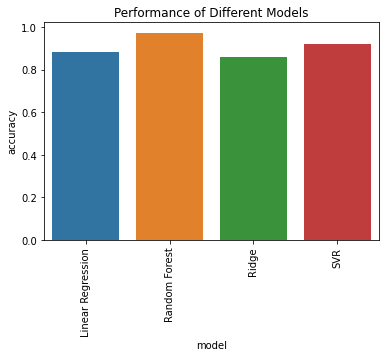

In [ ]:
sns.barplot(data = alg_vs_score, x='model', y='accuracy')
plt.title('Performance of Different Models')
plt.xticks(rotation = 'vertical')  


Adding the predicted data to the dataset

In [ ]:
last_date = appl_df1.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
appl_df1['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    appl_df1.loc[next_date] = [np.nan for _ in range(len(appl_df1.columns)-1)]+[i]

<ipython-input-52-895370cb3487>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl_df1['Forecast'] = np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Visualizing Adj Close and the Forecast data

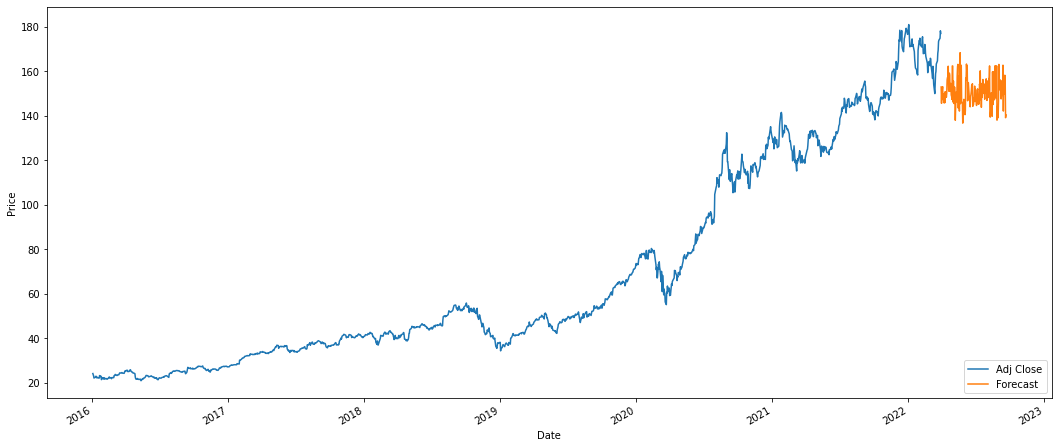

In [ ]:
plt.figure(figsize=(18, 8))
appl_df1['Adj Close'].plot()
appl_df1['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()